In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn as sl
import copy
from scipy import stats
%matplotlib inline

In [2]:
def reject_outliers(data, m=1.5):
    quartile_1, quartile_3 = np.percentile(data, [25, 75]) # Plockar ut kvartil 1 och 3
    iqr = quartile_3 - quartile_1 # Beräknar kvartilavståndet
    lower_bound = quartile_1 - (iqr * m) # Beräknar nedre outliergräns
    upper_bound = quartile_3 + (iqr * m) # Beräknar övre outliergräns
    dataWithoutLowerOutliers = data[data > lower_bound] # Tar bort nedre outliers
    dataWithoutOutliers = data[dataWithoutLowerOutliers < upper_bound] # Tar bort övre outliers.
    
    return dataWithoutOutliers # Returnerar resultatet.

# Funktion "reject_outliers" som identifierar och tar bort outliers som baseras på iqr(InterQuartileRange)-metoden.

In [3]:
the_data = pd.read_csv('Wholesale customers data.csv')
the_data.head()
#Channel -Customers Channel-:
#    1 = Horeca (an acronym for HOtel/REstaurant/CAfe) 
#    2 = Retail channel
#REGION -customers Region-:
#    1 = Lisnon 
#    2 =  Oporto 
#    3 = Other
#FRESH: annual spending (m.u.) on fresh products
#MILK: annual spending (m.u.) on milk products
#GROCERY: annual spending (m.u.) on grocery products
#FROZEN: annual spending (m.u.) on frozen products
#DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products
#DELICATESSEN: annual spending (m.u.) on and delicatessen products

# Använder "Head()" för att få en överblick på datasetet.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
the_data.describe()

# "Describe()" ger oss en statistisk översikt.
# Till exempel så kan vi dra slutsatsen att datasetet inte är normalfördelat eftersom att median och medelvärde inte
# är lika.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


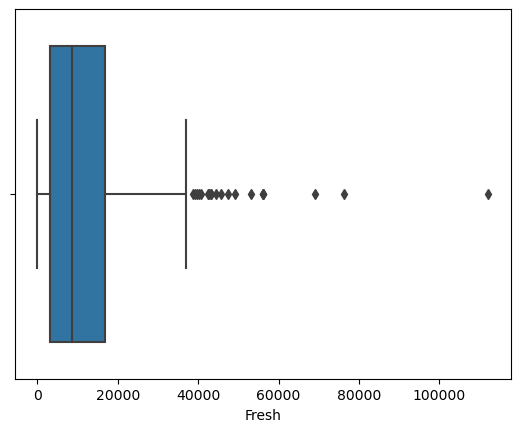

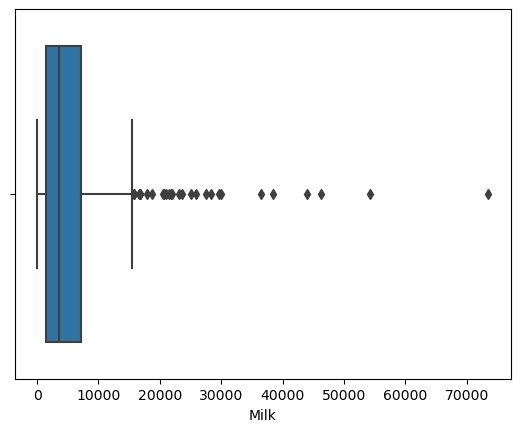

In [5]:
sns.boxplot(data=the_data, x ='Fresh')
plt.show()
sns.boxplot(data=the_data, x ='Milk')
plt.show()

# Här visualiserar vi data för att indentifiera eventuella outliers.

In [6]:
data_copy = copy.deepcopy(the_data)
df= reject_outliers(data_copy)

# Efter att vi identifierat outliers så tar vi bort dessa här med hjälp av vår funktion "reject_outliers"
# som baseras på iqr(InterQuartileRange)-metoden.

In [7]:
df.head()

# Uptäcker att det finns NAN-värden

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,NaN,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,3,NaN,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,NaN,5410.0,7198.0,3915.0,1777.0,5185.0


In [8]:
df.isna().sum().sum()

# Räknar hur många NAN-värden det finns...

339

In [9]:
df = df.dropna()
df.describe()

# Här har vi tesetat olika sätt att hantera NAN-värden. Bland annat att fylla dem med median eller medelvärde.
# Det visade sig inte vara en hållbar metod eftersom att det fanns så många NAN-värden vilket påverkade datasetet mycket.
# Det gjorde att vårt resonemang landade på att vi måste ta bort dessa rader som innehåller NAN-värden.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.200000,2.526829,5363.370732,3441.687805,4356.970732,2053.936585,1471.185366,938.302439
std,0.400979,0.795522,3498.206001,2714.125539,3251.269287,2122.304404,1825.887621,990.945872
min,1.000000,1.000000,3.000000,55.000000,137.000000,38.000000,5.000000,3.000000
25%,1.000000,2.000000,2362.000000,1175.000000,1841.000000,561.000000,223.000000,303.000000
50%,1.000000,3.000000,5224.000000,2521.000000,3047.000000,1218.000000,514.000000,686.000000
75%,1.000000,3.000000,8190.000000,5164.000000,6536.000000,2583.000000,2208.000000,1282.000000
max,2.000000,3.000000,11867.000000,11577.000000,11874.000000,9735.000000,7572.000000,7844.000000


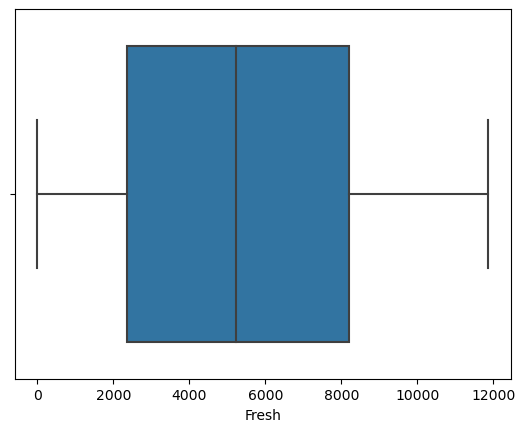

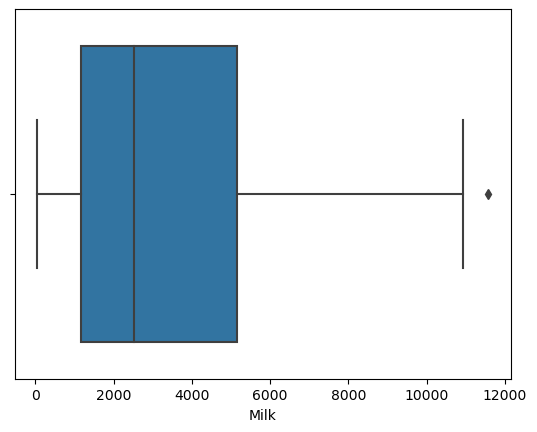

In [10]:
sns.boxplot(data=df, x ='Fresh')
plt.show()
sns.boxplot(data=df, x ='Milk')
plt.show()

# Visualiserar datan igen för att se hur det ser ut efter korrigering.

In [11]:
scaler = sl.preprocessing.MaxAbsScaler()
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

# Här genomförs en normalisering av datasetet för att all data ska få samma skala och motverka att något data väger tyngre
# än något annat vid visualisering.

In [12]:
scaled_df.describe()

# Bekräftar normalisering

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.60000,0.842276,0.451957,0.297287,0.366934,0.210985,0.194293,0.119620
std,0.20049,0.265174,0.294784,0.234441,0.273814,0.218008,0.241137,0.126332
min,0.50000,0.333333,0.000253,0.004751,0.011538,0.003903,0.000660,0.000382
25%,0.50000,0.666667,0.199039,0.101494,0.155045,0.057627,0.029451,0.038628
50%,0.50000,1.000000,0.440212,0.217759,0.256611,0.125116,0.067882,0.087455
75%,0.50000,1.000000,0.690149,0.446057,0.550446,0.265331,0.291601,0.163437
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


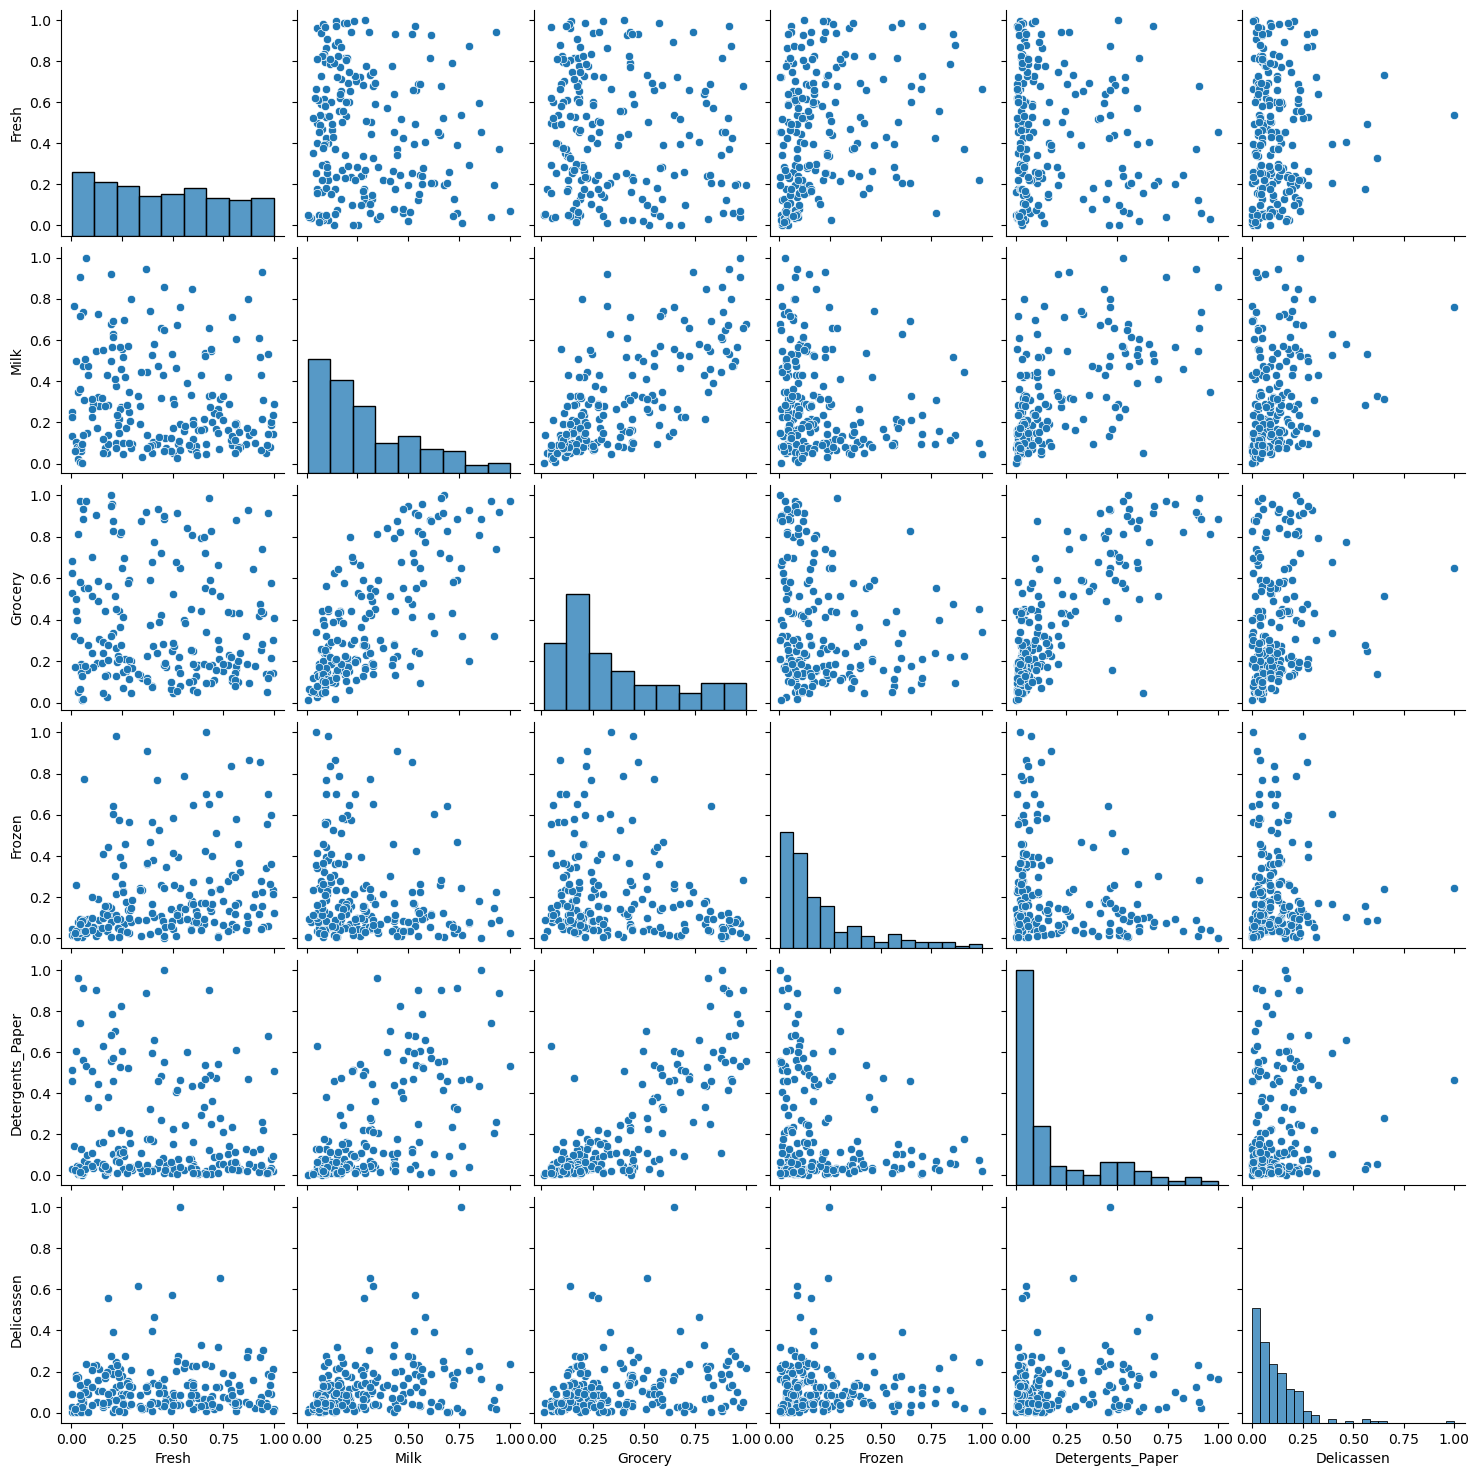

In [13]:
sns.pairplot(data=scaled_df, vars=['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper', 'Delicassen'])
plt.show()

# Visar relation mellan de olika features i datasetet.
# Efter granskning så valdes Detergents_Paper vs Frozen för klustring.

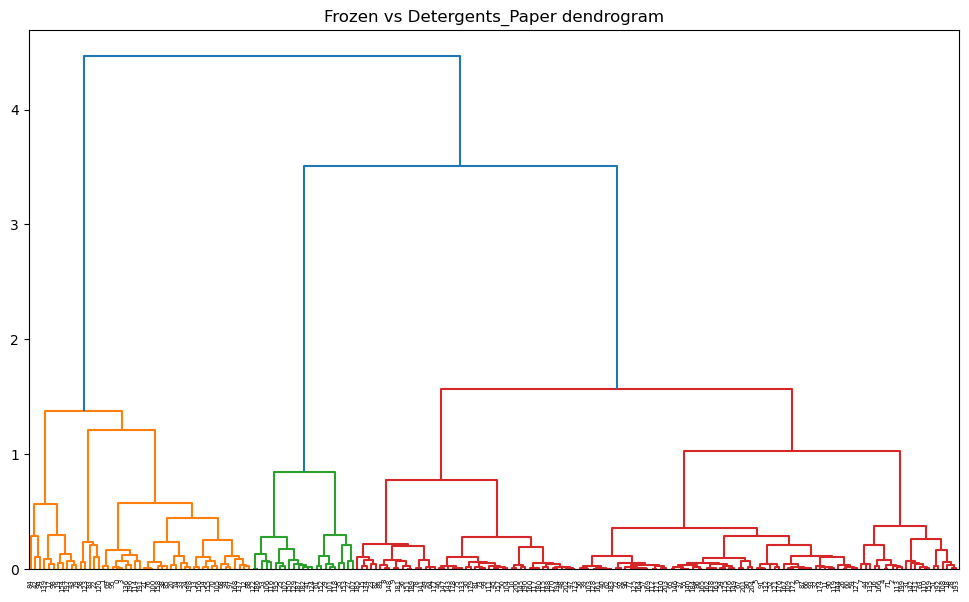

In [14]:
dfFrozenDetergents_Paper = scaled_df[["Frozen","Detergents_Paper"]]
dfFrozenDetergents_Paper.shape
plt.figure(figsize=(12,7))
plt.title("Frozen vs Detergents_Paper dendrogram")
dend= sch.dendrogram(sch.linkage(dfFrozenDetergents_Paper, method='ward'))

# Här görs ett dendrogram för att få hjälp med att bestämma antal kluster.
# Vi väljer att köra med 6 stycken kluster.

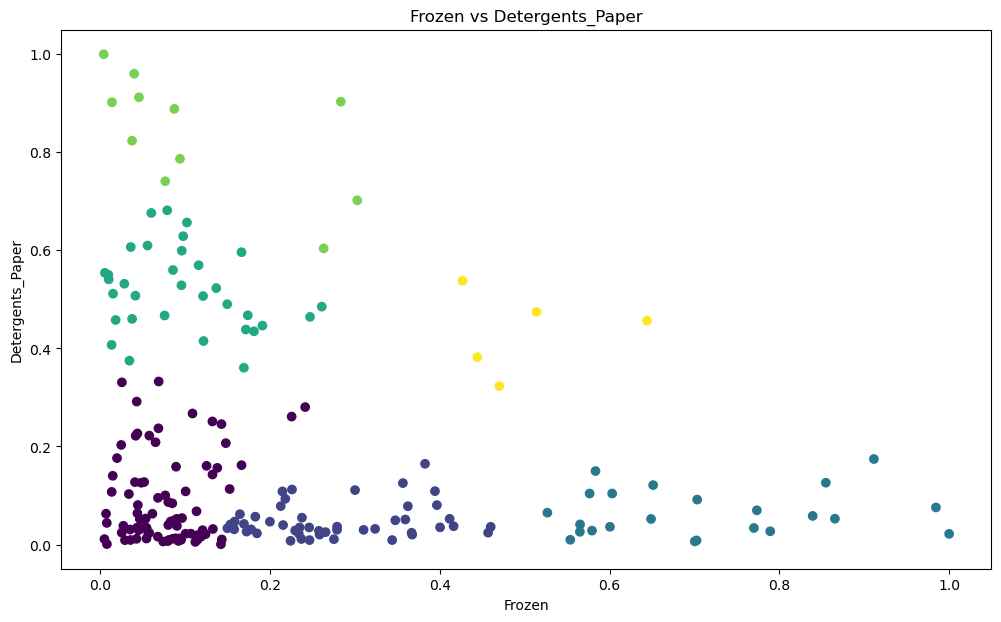

In [15]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(dfFrozenDetergents_Paper)
labels = cluster.labels_

plt.figure(figsize=(12,7))
plt.scatter(dfFrozenDetergents_Paper['Frozen'],dfFrozenDetergents_Paper['Detergents_Paper'],c=labels)
plt.title("Frozen vs Detergents_Paper")
plt.xlabel("Frozen")
plt.ylabel("Detergents_Paper")
plt.show()

# Här kan vi se att de som säljer mycket av "Frozen" säljer nästan inget av "Detergents_Paper" och vice versa.
# Vi kan även konstatera att det finns en liten grupp som säljer medianmycket av båda.